У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data_path = 'data/yulu_rental.csv'
df = pd.read_csv(data_path)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

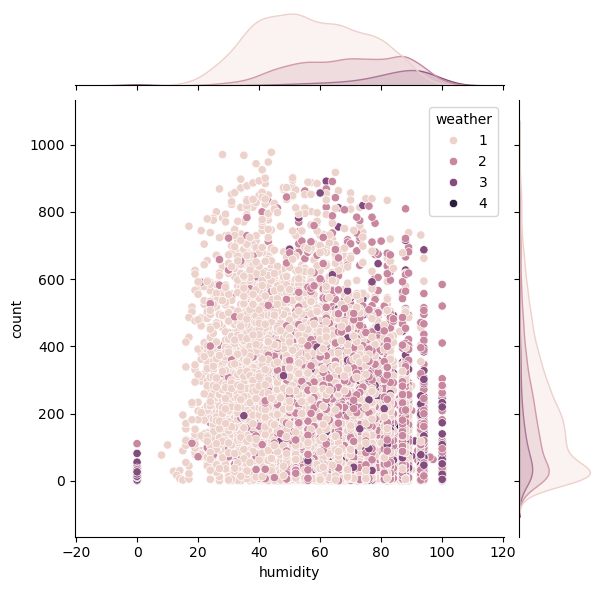

In [17]:
sns.jointplot( data = df, x = 'humidity', y = 'count', hue='weather')
plt.show()

На графіку можно побачити, що погодні умови та вологість впливає на кількість взятих в аренду велосипедів, тобто при гарних погодних умовах наприклад 1 (Ясно, Мало хмарно, частково хмарно) та 2 (Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман) без снігу та дощу та помірній вологості повітря від 20 до 80-90 кількість взятих в аренду велосипедів більша, ніж при іншиї показниках.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

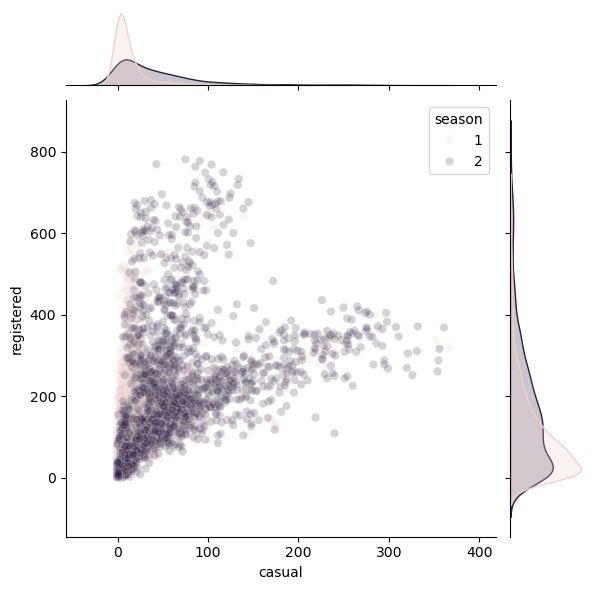

In [19]:
df_filtered_season = df[df['season'] <= 2]
sns.jointplot( data = df_filtered_season, x = 'casual', y = 'registered', hue='season', alpha=0.2)
plt.show()

На графіку можемо побачити залежність неформальних та зареєстрованих користувачів відносно сезону року (1 - весна, 2 - літо).
Бачимо, що коли кількість зареєстрованих користувачів зростає, то більшає і неформальних користувачів також. Також неформальних користувачів більше, ніж зареєстрованих. Для сезону 2 (літо) бачу більш рівномірну кількість користувачів, для сезону 2 (весна) кількість залежить можливо ще від погодних умов у цьому сезоні (або акцій, рекламних кампаній).

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


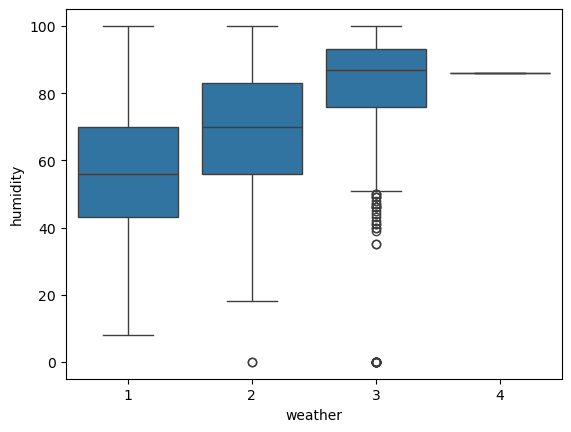

In [21]:
sns.boxplot(data=df, x="weather", y="humidity")
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

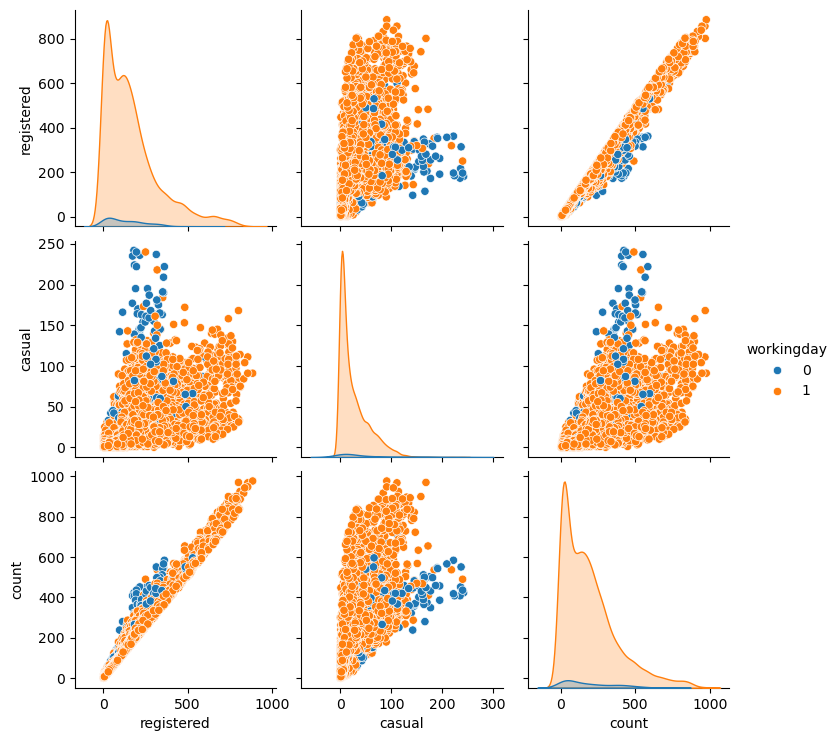

In [112]:
filter_days = (df['workingday'] == 1) | ((df['workingday'] == 0) & (df['holiday'] == 1))
df_filtered = df[filter_days][['registered', 'casual', 'count', 'workingday']]
sns.pairplot(data=df_filtered, hue='workingday');
plt.show()

На графіках можемо побачити, що у святкові дні користувачі меньш активниші, ніж у будні.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [33]:
df['datetime'] = pd.to_datetime(df.datetime)
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [35]:
df['date'] = df.datetime.dt.date

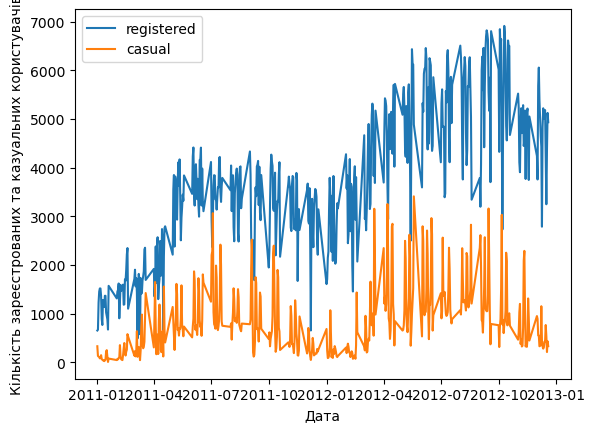

In [110]:
df_viz = df[['date', 'registered', 'casual']]
df_viz_grouped_by_date = df_viz.groupby('date').sum().reset_index('date')
# df_viz_grouped_by_date
plt.plot(df_viz_grouped_by_date['date'], df_viz_grouped_by_date['registered'], label='registered')
plt.plot(df_viz_grouped_by_date['date'], df_viz_grouped_by_date['casual'], label='casual')
plt.xlabel('Дата')
plt.ylabel('Кількість зареєстрованих та казуальних користувачів')
plt.legend()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
